# <center>EDA | Price Prediction | Ames Housing</center>

### Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

### Ames Data Set

Let's explore any extreme outliers in our Ames Housing Data Set

In [5]:
df = pd.read_csv("Ames_Housing_Data.csv")
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [6]:
# Lets see what are the features that really have an effect on the sale price
df.corr()['SalePrice'].sort_values(ascending=False)[1:11]

/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_24817/33565442.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['SalePrice'].sort_values(ascending=False)[1:11]


Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Name: SalePrice, dtype: float64

#### Dealing with Outliers

##### Visualize and Describe the Data

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

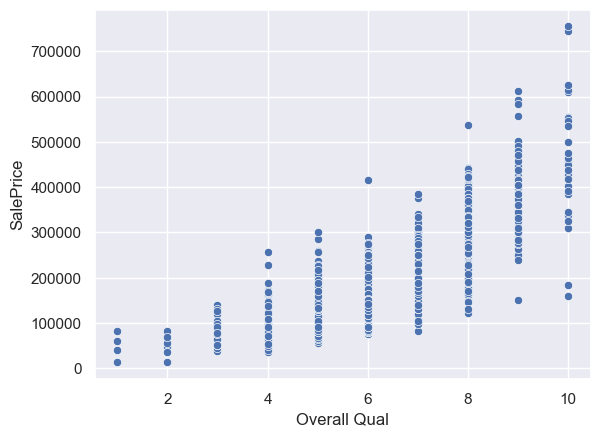

In [7]:
# Overall Qual has significant effect on the sale price, so lets check it out
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

**From the *scatterplot* We can see for sure these 3 points that have high Overall Qual and low price**

/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_24817/4143324588.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SalePrice"])


<Axes: xlabel='SalePrice', ylabel='Density'>

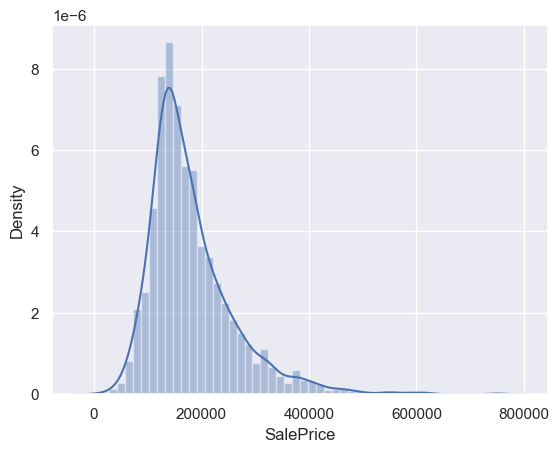

In [8]:
sns.distplot(df["SalePrice"])

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

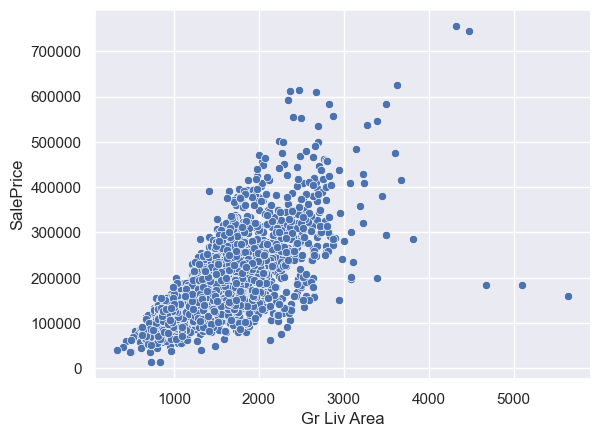

In [9]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

**From the *scatterplot* We can see for sure these 3 points thats not following the trend**

*Are these 3 points on each scatterplot are the same ? Lets try to know if they are*

In [10]:
# Lets try to get these points that looks like outliers from the Overall Qual scatter plot
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)] 

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [11]:
# Lets try to get these points that looks like outliers from the Gr Liv Area scatter plot
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


*Trimming or Fixing Based Off Domain Knowledge*

So the really outliers point are the ones that showed on both filters, Lets get and drop them

In [12]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<200000)].index

Int64Index([1498, 2180, 2181], dtype='int64')

In [13]:
ind_drop = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<200000)].index

In [14]:
df = df.drop(ind_drop,axis=0)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

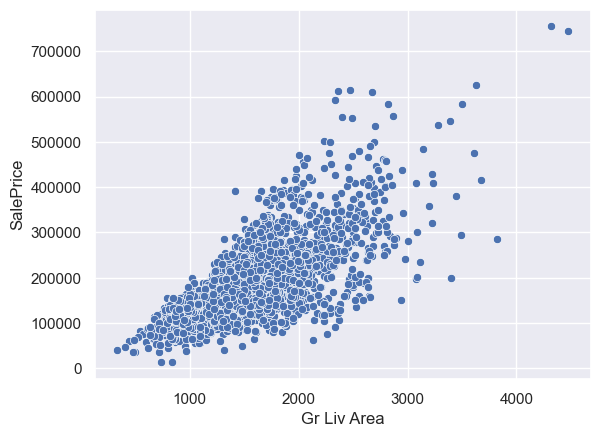

In [15]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

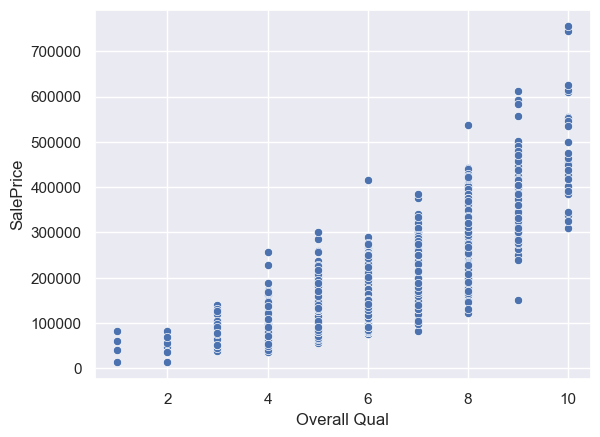

In [16]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

In [17]:
df.to_csv("Ames_outliers_removed.csv",index=False)

---

#### Dealing with Missing Data

In [18]:
with open("Ames_Housing_Feature_Description.txt", "r") as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [19]:
df = pd.read_csv('Ames_outliers_removed.csv')
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2923,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2924,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2925,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [21]:
# We already have an index, so we don't need the PID unique identifier for the regression we will perform later on.
df = df.drop('PID',axis=1)

In [22]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [23]:
# As shown above we have missing values but what is as % from the total dataset we have ?
(100 * df.isnull().sum() / len(df)).sort_values(ascending=False)

Pool QC         99.590024
Misc Feature    96.412709
Alley           93.235395
Fence           80.457807
Fireplace Qu    48.582166
                  ...    
Heating QC       0.000000
MS Zoning        0.000000
1st Flr SF       0.000000
2nd Flr SF       0.000000
SalePrice        0.000000
Length: 80, dtype: float64

In [24]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values(ascending=False)
    return percent_nan
percent_nan = percent_missing(df)

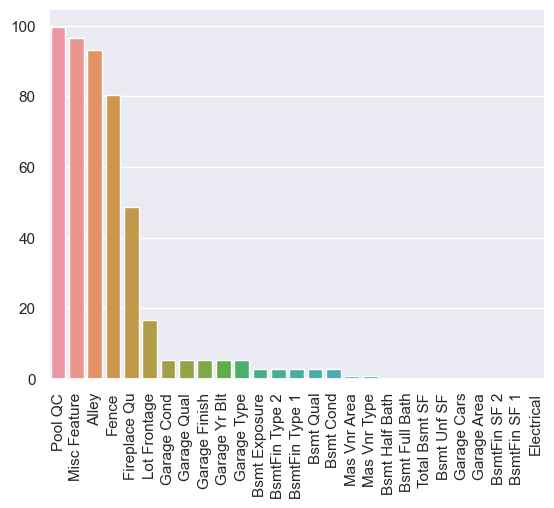

In [25]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

### Working based on Rows Missing Data

#### Filling in Data or Dropping Data?

(0.0, 1.0)

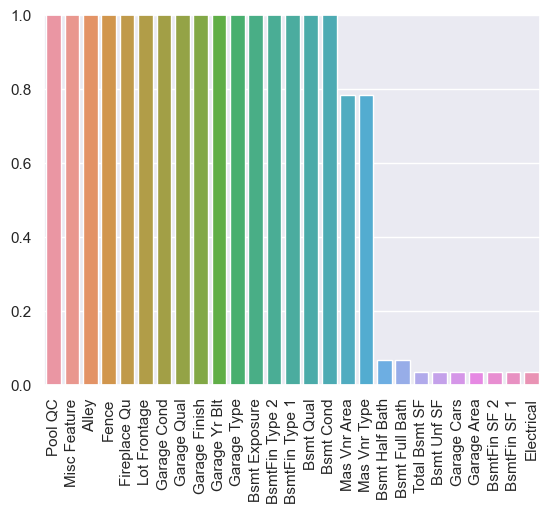

In [26]:
# Lets see what features where the missing percent 0-1%, I don't
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Set 1% Threshold
plt.ylim(0,1)

In [27]:
# Could also use condition
percent_nan[percent_nan < 1]

Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
Garage Cars       0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
BsmtFin SF 1      0.034165
Electrical        0.034165
dtype: float64

In [28]:
len(percent_nan[percent_nan < 1])

11

In [29]:
# if only one row is missing in the data what percentage represents it
100/len(df)

0.0341646737273659

In [30]:
# One row is missing Electrical
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1576,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [31]:
# One row is missing Garage Cars
df[df['Garage Cars'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2233,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [32]:
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

In [33]:
percent_nan = percent_missing(df)
percent_nan[percent_nan < 1]

Mas Vnr Area      0.786325
Mas Vnr Type      0.786325
Bsmt Half Bath    0.068376
Bsmt Full Bath    0.068376
Bsmt Unf SF       0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Total Bsmt SF     0.034188
dtype: float64

In [34]:
len(percent_nan[percent_nan < 1])

8

In [35]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [36]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [37]:
df[df['Bsmt Unf SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [38]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


**There are 2 types of basement features, numerical and string descriptives.**

In [39]:
# The numerical basement columns:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [40]:
# The string basement columns:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [41]:
percent_nan = percent_missing(df)
percent_nan[percent_nan < 1]

Mas Vnr Type    0.786325
Mas Vnr Area    0.786325
dtype: float64

**Mas Vnr Feature**

Based on the Description Text File, Mas Vnr Type and Mas Vnr Area being missing (NaN) is likely to mean the house simply just doesn't have a masonry veneer, in which case, we will fill in this data as we did before.

In [42]:
# The string Mas Vnr Columns:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
# The numerical Mas Vnr Columns:
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [43]:
percent_nan = percent_missing(df)
percent_nan[percent_nan < 1]

Series([], dtype: float64)

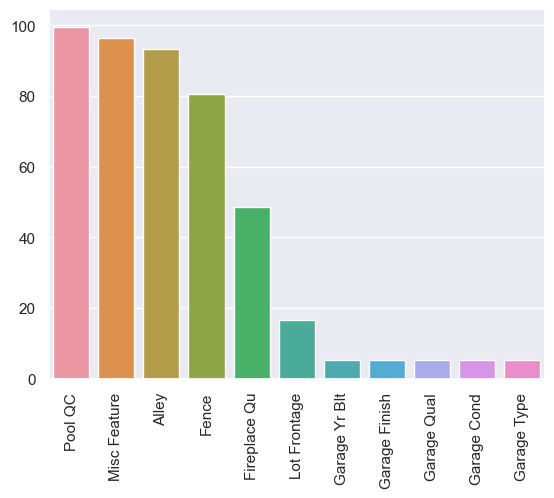

In [44]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

### Working based on Columns Missing Data

#### Filling in Data or Dropping Data?

##### Garage Columns
Based on the data description, these NaN seem to indicate no garage, so we will substitute with "None" or 0.

In [45]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2922,Detchd,Unf,TA,TA
2923,Attchd,Unf,TA,TA
2924,NaN,NaN,NaN,NaN
2925,Attchd,RFn,TA,TA


In [46]:
percent_nan

Pool QC          99.589744
Misc Feature     96.410256
Alley            93.230769
Fence            80.478632
Fireplace Qu     48.547009
Lot Frontage     16.752137
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Garage Type       5.367521
dtype: float64

In [47]:
# The string Garage Columns:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

# The numerical Garage Columns:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [48]:
percent_nan = percent_missing(df)
percent_nan

Pool QC         99.589744
Misc Feature    96.410256
Alley           93.230769
Fence           80.478632
Fireplace Qu    48.547009
Lot Frontage    16.752137
dtype: float64

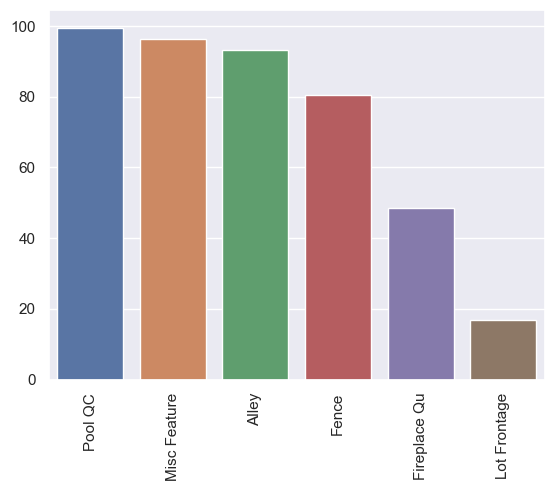

In [49]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

#### Dropping Feature Columns


In [50]:
percent_nan.index

Index(['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu',
       'Lot Frontage'],
      dtype='object')

In [51]:
df[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature','Pool QC']]

,Lot Frontage,Fireplace Qu,Fence,Alley,Misc Feature,Pool QC
0,141.0,Gd,NaN,NaN,NaN,NaN
1,80.0,NaN,MnPrv,NaN,NaN,NaN
2,81.0,NaN,NaN,NaN,Gar2,NaN
3,93.0,TA,NaN,NaN,NaN,NaN
4,74.0,TA,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...
2922,37.0,NaN,GdPrv,NaN,NaN,NaN
2923,NaN,NaN,MnPrv,NaN,NaN,NaN
2924,62.0,NaN,MnPrv,NaN,Shed,NaN
2925,77.0,TA,NaN,NaN,NaN,NaN


In [52]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [53]:
percent_nan = percent_missing(df)
percent_nan

Fireplace Qu    48.547009
Lot Frontage    16.752137
dtype: float64

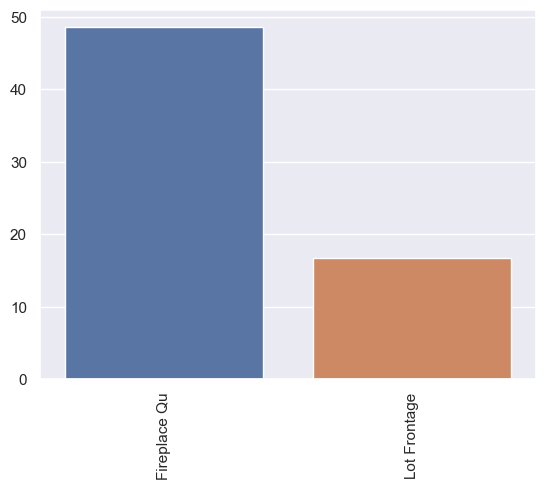

In [54]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [55]:
# Filling in Fireplace Quality based on Description Text
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

In [56]:
percent_nan = percent_missing(df)
percent_nan

Lot Frontage    16.752137
dtype: float64

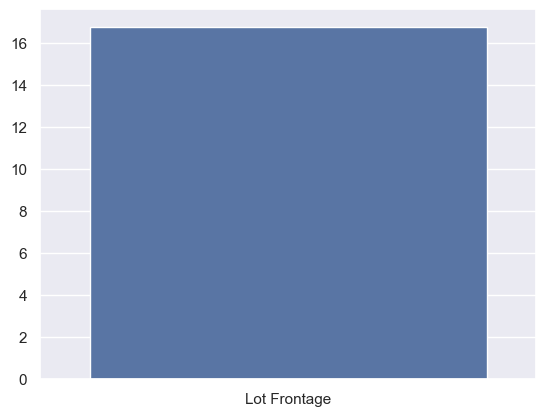

In [57]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks();

To impute missing data, we need to decide what other filled in (no NaN values) feature most probably relates and is correlated with the missing feature data. In this particular case we will use:

Neighborhood: Physical locations within Ames city limits

LotFrontage: Linear feet of street connected to property

We will operate under the assumption that the Lot Frontage is related to what neighborhood a house is in.

In [58]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

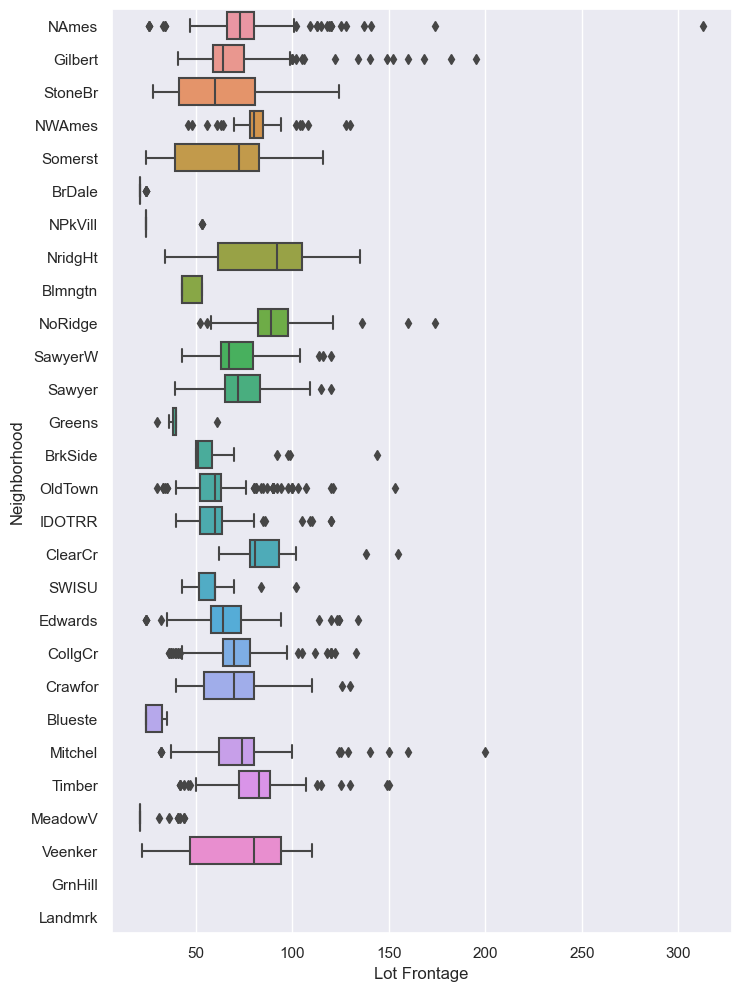

In [59]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

In [60]:
df.groupby('Neighborhood')['Lot Frontage']

In [61]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [62]:
df[df['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
11,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,500,3,2010,WD,Normal,185000
14,120,RL,NaN,6820,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,140,0,0,6,2010,WD,Normal,212000
22,60,FV,NaN,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,WD,Normal,216000
23,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,700,3,2010,WD,Normal,149000
24,20,RL,NaN,12537,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,149900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2891,20,RL,NaN,16669,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2006,WD,Normal,228000
2894,60,RL,NaN,11170,Pave,IR2,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2006,WD,Normal,250000
2895,20,RL,NaN,8098,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2006,WD,Normal,202000
2909,90,RL,NaN,11836,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,146500


In [63]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [64]:
percent_nan = percent_missing(df)
percent_nan

Lot Frontage    0.102564
dtype: float64

In [65]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [66]:
percent_nan = percent_missing(df)
percent_nan

Series([], dtype: float64)

**We no longer have any missing data in our entire data set!**

In [67]:
df.to_csv("Ames_NO_Missing_Data.csv",index=False)

---

### Dealing with Categorical Data


In [68]:
df = pd.read_csv('Ames_NO_Missing_Data.csv')
df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.000000,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.000000,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.000000,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.000000,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.000000,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,80,RL,37.000000,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,142500
2921,20,RL,75.144444,8885,Pave,IR1,Low,AllPub,Inside,Mod,...,0,0,0,0,0,6,2006,WD,Normal,131000
2922,85,RL,62.000000,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,132000
2923,20,RL,77.000000,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,0,4,2006,WD,Normal,170000


    MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [69]:
# MSSubClass
# Convert to String
df['MS SubClass'] = df['MS SubClass'].apply(str)

##### Creating Dummy Variables from Object Columns


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2925 non-null   object 
 1   MS Zoning        2925 non-null   object 
 2   Lot Frontage     2925 non-null   float64
 3   Lot Area         2925 non-null   int64  
 4   Street           2925 non-null   object 
 5   Lot Shape        2925 non-null   object 
 6   Land Contour     2925 non-null   object 
 7   Utilities        2925 non-null   object 
 8   Lot Config       2925 non-null   object 
 9   Land Slope       2925 non-null   object 
 10  Neighborhood     2925 non-null   object 
 11  Condition 1      2925 non-null   object 
 12  Condition 2      2925 non-null   object 
 13  Bldg Type        2925 non-null   object 
 14  House Style      2925 non-null   object 
 15  Overall Qual     2925 non-null   int64  
 16  Overall Cond     2925 non-null   int64  
 17  Year Built    

In [71]:
df.select_dtypes(include='object')

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2921,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2922,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2923,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [72]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [73]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2925 non-null   float64
 1   Lot Area         2925 non-null   int64  
 2   Overall Qual     2925 non-null   int64  
 3   Overall Cond     2925 non-null   int64  
 4   Year Built       2925 non-null   int64  
 5   Year Remod/Add   2925 non-null   int64  
 6   Mas Vnr Area     2925 non-null   float64
 7   BsmtFin SF 1     2925 non-null   float64
 8   BsmtFin SF 2     2925 non-null   float64
 9   Bsmt Unf SF      2925 non-null   float64
 10  Total Bsmt SF    2925 non-null   float64
 11  1st Flr SF       2925 non-null   int64  
 12  2nd Flr SF       2925 non-null   int64  
 13  Low Qual Fin SF  2925 non-null   int64  
 14  Gr Liv Area      2925 non-null   int64  
 15  Bsmt Full Bath   2925 non-null   float64
 16  Bsmt Half Bath   2925 non-null   float64
 17  Full Bath     

In [74]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2925 non-null   object
 1   MS Zoning       2925 non-null   object
 2   Street          2925 non-null   object
 3   Lot Shape       2925 non-null   object
 4   Land Contour    2925 non-null   object
 5   Utilities       2925 non-null   object
 6   Lot Config      2925 non-null   object
 7   Land Slope      2925 non-null   object
 8   Neighborhood    2925 non-null   object
 9   Condition 1     2925 non-null   object
 10  Condition 2     2925 non-null   object
 11  Bldg Type       2925 non-null   object
 12  House Style     2925 non-null   object
 13  Roof Style      2925 non-null   object
 14  Roof Matl       2925 non-null   object
 15  Exterior 1st    2925 non-null   object
 16  Exterior 2nd    2925 non-null   object
 17  Mas Vnr Type    2925 non-null   object
 18  Exter Qu

In [75]:
# Converting
df_objs = pd.get_dummies(df_objs,drop_first=True)
df_objs

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2921,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2923,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [76]:
final_df = pd.concat([df_nums,df_objs],axis=1)
final_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,0,0,0,0,1,0,0,0,1,0
2921,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,0,0,0,0,1,0,0,0,1,0
2922,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,1,0,0,0,1,0
2923,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,0,0,0,0,1,0,0,0,1,0


---

In [77]:
final_df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice            1.000000
Overall Qual         0.802637
Gr Liv Area          0.727279
Total Bsmt SF        0.660983
Garage Cars          0.648488
                       ...   
Garage Finish_Unf   -0.422363
Bsmt Qual_TA        -0.453022
Fireplace Qu_None   -0.481740
Kitchen Qual_TA     -0.527461
Exter Qual_TA       -0.591459
Name: SalePrice, Length: 274, dtype: float64

In [78]:
final_df.to_csv('AMES_Final_DF.csv')

---
---

# <center>Simple Linear Regression</center>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from datetime import datetime
import os
sns.set()

In [2]:
# Load the dataset from a CSV file
df = pd.read_csv('AMES_Final_DF.csv')

df = df.drop('Unnamed: 0', axis=1)

In [3]:
display(df.head())
display(df.info())

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Columns: 274 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(263)
memory usage: 6.1 MB


None

In [4]:
# Separate the target variable ('SalePrice') from the features
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [6]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets with a 90-10 split ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [7]:
from sklearn.preprocessing import StandardScaler
# Standardize the features using StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [10]:
from sklearn.linear_model import ElasticNet
# Create an ElasticNet model with default parameters
base_elastic_model = ElasticNet(max_iter=1000000)

In [20]:
# Define a parameter grid for hyperparameter tuning
param_grid = {'alpha':[0.1, 1, 5, 10, 100],
              'l1_ratio':[.1, .7, .99, 1]}

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
# Perform hyperparameter tuning using GridSearchCV
grid_model = GridSearchCV(base_elastic_model,
                        param_grid=param_grid,
                        scoring='neg_mean_squared_error',
                        cv=5, verbose=1)

In [23]:
# Fit the grid search model to the scaled training data
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=1000000),
             param_grid={'alpha': [0.1, 1, 5, 10, 100],
                         'l1_ratio': [0.1, 0.7, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [24]:
# Display the best hyperparameters found during the grid search
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [25]:
# Use the best model to make predictions on the scaled testing data
y_pred = grid_model.predict(scaled_X_test)

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [36]:
pd.options.display.float_format = '{:.2f}'.format
# Calculate and display the mean absolute error (MAE) and root mean squared error (RMSE)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'SalePrice'],
    'Value': [MAE, MSE, RMSE, df['SalePrice'].mean()]
})
results

,Metric,Value
0,MAE,14195.35
1,MSE,422652274.50
2,RMSE,20558.51
3,SalePrice,180815.54



---
---
---

#### OLS

In [ ]:
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()

In [ ]:
# y = B1x+B0
np.polyfit(X, y, deg=1)

In [ ]:
potential_spend = np.linspace(0, 500, 100)

In [ ]:
predicted_sales = 0.04868788*potential_spend + 4.24302822

In [ ]:
sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(potential_spend, predicted_sales, color='red') #, sns.regplot(data=df, x='total_spend', y='sales')

**If our next advertising campaign is gonna be 200,000$ so how many units are expected in sale?**

In [ ]:
spend = 200
predicted_sale = 0.04868788*spend + 4.24302822
predicted_sale

**np.polyfit() can work with higher degree polynomial**

For Example:
$$
y = B_3x^3 + B_2x^2 + B_1x + B_0
$$


In [ ]:
np.polyfit(X, y, deg=3)

In [ ]:
# Lets use this new higher order equation
pred_sales = (potential_spend**3) * 3.07615033e-07 + (potential_spend**2) * -1.89392449e-04 + (potential_spend) * 8.20886302e-02 + 2.70495053e+00
sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(potential_spend, pred_sales, color='red') #, sns.regplot(data=df, x='total_spend', y='sales')

---
---


## <center>Linear Regression with SciKit-Learn</center>

- Previously, we explored "Is there a relationship between *total* advertising spend and *sales*?"
- Now we expand this to "What is the relationship between each *(TV, Radio, Newspaper)* and *sales*?"

also, let's greatly expand our toolkit to start thinking about the considerations of overfitting, underfitting, model evaluation, as well as multiple features!

In [ ]:
df = pd.read_csv("Advertising.csv")
df

In [ ]:
# Outlier Analysis

fig, axs = plt.subplots(3, figsize=(5, 5))
plt1 = sns.boxplot(x=df['TV'], ax=axs[0], orient='h')
plt2 = sns.boxplot(x=df['newspaper'], ax=axs[1], orient='h')
plt3 = sns.boxplot(x=df['radio'], ax=axs[2], orient='h')
plt.tight_layout()

plt.show()

In [ ]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Multiple Features (N-Dimensional)

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout()

Visually we can already see that *TV* and *Radio* do have some positive corelation

In [ ]:
# Relationships between features
sns.pairplot(df,diag_kind='kde')

In [ ]:
X = df.drop(['sales'], axis=1)
X

In [ ]:
y = df['sales']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
display(X_train)
display(X_test)
display(y_train)
display(y_test)

In [ ]:
# Import a model class from a model family
from sklearn.linear_model import LinearRegression

In [ ]:
# Create an instance of the model with parameters
model = LinearRegression()

**Make sure you only fit to the training data, in order to fairly evaluate your model's performance on future data**

In [ ]:
# Fit/Train the Model on the training data
model.fit(X_train,y_train)

In [ ]:
test_predictions = model.predict(X_test)
test_predictions

Now that we have a fitted model that can preform predictions based on features, *How do we decide if they are any good?* 

**Fortunately we have the known test labels to compare our results to.**


**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors

**Mean Squared Error** (MSE) is the mean of the squared errors

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors

All of these are **loss functions**, because we want to minimize them.

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
MAE = mean_absolute_error(y_test,test_predictions) 
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'Mean Sales'],
    'Value': [MAE, MSE, RMSE, df['sales'].mean()]
})
results

In [ ]:
sns.histplot(data=df, x='sales', bins=20)

In [ ]:
# Doing residuals separately will alert us to any issue with the split call
test_residuals = y_test - test_predictions
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0, color='r', linestyle='-')

In [ ]:
sns.displot(test_residuals,bins=20,kde=True)

In [ ]:
# Still unsure if normality is a reasonable approximation? 
# We can check against the [normal probability plot.]

import scipy as sp

# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residuals,plot=ax)

-------
--------

### Retraining Model on Full Data

In [ ]:
final_model = LinearRegression()
final_model.fit(X,y)

In [ ]:
display(final_model.coef_)
X.head(1)

In [ ]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

In [ ]:
# Final Model Fit
y_hat = final_model.predict(X)
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout()

In [ ]:
residuals = y_hat - y
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

**149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?**

In [ ]:
X.head(0)

In [ ]:
# Prediction on New Data
campaign = [[149,22,12]]
final_model.predict(campaign)

### Deployment, Predictions, and Model Attributes

In [ ]:
from joblib import dump, load

In [ ]:
dump(final_model, 'sales_model.joblib')

In [ ]:
loaded_model = load('sales_model.joblib')

In [ ]:
display(X.head(0))
campaign

In [ ]:
loaded_model.predict(campaign)

-------
--------

## <center>Polynomial Regression with SciKit-Learn</center>

<center>let's greatly expand our toolkit to start thinking about the considerations of overfitting, underfitting, model evaluation, as well as multiple features!</center>

Lets consider *interaction terms* ... What if features are only significant when in sync with one another.
* Perhaps newspaper advertising spend by it self is not effective, but greatly increase effectiveness if added to a TV advertising campaign. 

**<center>How can we check for this?</center>**

We will go from the equation in the form (shown here as if we only had one x feature):

$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$

and create more features from the original x feature for some *d* degree of polynomial.

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1 + \epsilon$$

In [ ]:
df

In [ ]:
X

In [ ]:
y.to_frame()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [ ]:
# Converter "fit" to data, in this case, reads in every X column
polynomial_converter.fit(X)

In [ ]:
# Then "transforms" and ouputs the new polynomial data
polynomial_converter.transform(X)

In [ ]:
# Converter "fits" to data, in this case, reads in every X column
# Then it "transforms" and ouputs the new polynomial data
poly_features = polynomial_converter.fit_transform(X)

In [ ]:
X.shape, poly_features.shape

The interaction terms $$x_1  \cdot x_2 \text{  and  } x_1  \cdot x_3 \text{  and  }   x_2  \cdot x_3 $$

In [ ]:
X.iloc[0], poly_features[0]

In [ ]:
# Train | Test Split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
# Create an instance of the model with parameters
model = LinearRegression(fit_intercept=True)

In [ ]:
# Fit/Train the Model on the training data
model.fit(X_train,y_train)

In [ ]:
# Evaluation on the Test Set
test_predictions = model.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test,test_predictions) 
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'Mean Sales'],
    'Value': [MAE, MSE, RMSE, df['sales'].mean()]
})
results

In [ ]:
model.coef_

**Results on the Test Set (Note: Use the same Random Split to fairly compare!)**

* Simple Linear Regression:
    * MAE: 1.1244
    * RMSE: 1.4364
* Polynomial 2-degree:
    * MAE: 0.4431
    * RMSE: 0.5809

### Choosing a Model

let's explore higher order Polynomials in a loop and plot out their error. This will nicely lead us into a discussion on Overfitting.

* Let's use a for loop to do the following:

1. Create different order polynomial X data
2. Split that polynomial data for train/test
3. Fit on the training data
4. Report back the metrics on *both* the train and test results
5. Plot these results and explore overfitting

In [ ]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [ ]:
pd.DataFrame({'Train RMSE Errors': train_rmse_errors, 'Test RMSE Errors': test_rmse_errors}, index=range(1, len(train_rmse_errors)+1))

In [ ]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [ ]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

So should we choose degree of *3* or *4*? 

We get a better error using degree of 4 thats for sure but Logically if we think about the added complexity is it worth the risk to add complexity where there is a good 3rd degree interaction term. *Heres where domain knowledge Comes into play*

**I would recommend to go for 2nd degree or 3rd degree at most**

### Finalizing Model Choice


In [ ]:
# Based on our chart, could have also been degree=4, but 
# it is better to be on the safe side of complexity
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [ ]:
final_model = LinearRegression()
final_model.fit(final_poly_converter.fit_transform(X),y)

In [ ]:
dump(final_model, 'sales_poly_model.joblib') 

In [ ]:
# Recall that we will need to "convert" any incoming data to polynomial data
dump(final_poly_converter,'poly_converter.joblib')

**149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?**

In [ ]:
# Prediction on New Data
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

In [ ]:
campaign = [[149,22,12]]

In [ ]:
campaign_poly = loaded_poly.transform(campaign)
campaign_poly

In [ ]:
final_model.predict(campaign_poly)

## <center>Regularization with SciKit-Learn</center>

<center>we can be smarter about model choice and utilize regularization.</center>

- Let's explore two methods of regularization:

1- L2 Ridge Regression.

2- L1 Lasso Regression.

In [ ]:
X

In [ ]:
y.to_frame()

In [ ]:
# Polynomial Conversion
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

In [ ]:
# Train | Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

### Scaling the Data


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### L2 Ridge Regression.

In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=10)

In [ ]:
ridge_model.fit(X_train,y_train)

In [ ]:
test_predictions = ridge_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'Mean Sales'],
    'Value': [MAE, MSE, RMSE, df['sales'].mean()]
})
results

##### Choosing an alpha value with Cross-Validation


In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
from sklearn.metrics import SCORERS

In [ ]:
# All metrics follow convention "Higher is better"
SCORERS.keys()

In [ ]:
# Negative RMSE so all metrics follow convention "Higher is better"

# See all options: sklearn.metrics.SCORERS.keys()
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

In [ ]:
# The more alpha options you pass, the longer this will take.
# Fortunately our data set is still pretty small
ridge_cv_model.fit(X_train,y_train)

In [ ]:
ridge_cv_model.alpha_

In [ ]:
test_predictions = ridge_cv_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'Mean Sales'],
    'Value': [MAE, MSE, RMSE, df['sales'].mean()]
})
results

In [ ]:
ridge_cv_model.coef_


---

### L1 LASSO Regression

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)

In [ ]:
lasso_cv_model.fit(X_train,y_train)

In [ ]:
lasso_cv_model.alpha_

In [ ]:
test_predictions = lasso_cv_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'Mean Sales'],
    'Value': [MAE, MSE, RMSE, df['sales'].mean()]
})
results

In [ ]:
# Training Set Performance
train_predictions = lasso_cv_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

In [ ]:
# How many values are considered in the LASSO model to geth these results? 
lasso_cv_model.coef_

This came with a cost of a worst preforming model when it comes to MAE and RMSE but now the model is easier. But still pretty impressive getting these results considering only two features.

---

If we want we can get even better LASSO model by adjusting the eps and with more max iter. 

By that we giving it more time to search for those better alpha values. 

Its gonna consider more coefficient and slightly more complex model and still getting the benefits of not considering every single coefficient. 

In [ ]:
lasso_cv_model = LassoCV(eps=0.001,n_alphas=100,cv=5, max_iter=1000000)
lasso_cv_model.fit(X_train,y_train)
print(lasso_cv_model.alpha_)
test_predictions = lasso_cv_model.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'Mean Sales'],
    'Value': [MAE, MSE, RMSE, df['sales'].mean()]
})
results

In [ ]:
lasso_cv_model.coef_

**It all depends on the trade off you are willing to make between how complex the model are VS model performance**


---

### Elastic Net

Elastic Net combines the penalties of ridge regression and lasso in an attempt to get the best of both worlds!

In [ ]:
from sklearn.linear_model import ElasticNetCV

In [ ]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)

In [ ]:
elastic_model.fit(X_train,y_train)

In [ ]:
elastic_model.l1_ratio_

So the model says LASSO is the way to go

In [ ]:
lasso_cv_model.alpha_

In [ ]:
elastic_model.alpha_

In [ ]:
test_predictions = elastic_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'Mean Sales'],
    'Value': [MAE, MSE, RMSE, df['sales'].mean()]
})
results

In [ ]:
# Training Set Performance
train_predictions = elastic_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

In [ ]:
elastic_model.coef_

-------
--------

<details>
  <summary><strong>Done By</strong></summary>
  <p align="center">Ahmed NasrElDin</p>
</details>

-------
--------